In [1]:
import torch
from torch import nn
from torch import optim
import numpy as np
import matplotlib.pyplot as plt

import os, sys

from utils import device


In [2]:
from models.seq2seq import Seq2Seq

In [3]:
from preprocessing import loadDataset

pairs, vocab_size, word2id, id2word = loadDataset()
np.random.shuffle(pairs)

Importing and preprocessing data ...


In [4]:
def train(model, dataset, n_epochs=5, lr=1e-4, print_every=10000,
          save_model=True):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    loss_plot = []
    
#     for epoch in range(1, n_epochs + 1):
    epoch = 0
    while True:
        epoch += 1
        
        prev_mean_epoch_loss = 0
        mean_epoch_loss = 0
        
#         for batch_idx, (inputs, targets) in enumerate(dataloader):
        for batch_idx, pair in enumerate(dataset):
        
            inputs = torch.LongTensor(pair['input']).unsqueeze(-1).to(device)
            targets = torch.LongTensor(pair['target']).unsqueeze(-1).to(device)

            optimizer.zero_grad()
            
            outputs, prediction = model(inputs, targets)

            loss = criterion(outputs.view(-1, outputs.shape[-1]), targets[:len(outputs)].view(-1))
            
            loss.backward()
            optimizer.step()
            
            mean_epoch_loss += loss.item()
            
            if (batch_idx + 1) % print_every == 0:
#             if True:
            
                print("Batch %d / %d ----- Loss : %.4f" % (batch_idx, len(dataset), loss.item()/len(targets)))
                print('Q : ' + ''.join(id2word[str(pred.item())] + ' ' for pred in inputs.squeeze()))
                print('A : ' + ''.join(id2word[str(pred.item())] + ' ' for pred in prediction.squeeze()))
                
                
                loss_plot.append(mean_epoch_loss - prev_mean_epoch_loss)
                prev_mean_epoch_loss = mean_epoch_loss
#                 break
            
        plt.plot(np.array(loss_plot) / print_every, 'r')
        plt.xlabel('number of examples')
        plt.ylabel('Loss')
        plt.savefig('loss.png')
        plt.clf
        np.savetxt('loss.csv', np.array(loss_plot) / print_every)
            
        mean_epoch_loss /= len(dataset)
        print("Epoch %d ----- Loss : %.4f" % (epoch, mean_epoch_loss))
        
        if save_model:
            torch.save(model.state_dict(), 'trained_model.pt')
            

Batch 9999 / 186462 ----- Loss : 0.6734
Q : man we sure hit the jackpot fast around here . <EOS> 
A : i ? . . . <EOS> 
Batch 19999 / 186462 ----- Loss : 0.2616
Q : rewind that . <EOS> 
A : i m not . . . s . <EOS> 
Batch 29999 / 186462 ----- Loss : 0.5144
Q : that s a laugh . if i don t ask at least i won t be UNK him . <EOS> 
A : i i you s you . . . <EOS> 
Batch 39999 / 186462 ----- Loss : 3.0188
Q : see you tomorrow <EOS> 
A : i . 
Batch 49999 / 186462 ----- Loss : 0.3946
Q : so do i ... <EOS> 
A : i m be . . . . a . the way . . . <EOS> 
Batch 59999 / 186462 ----- Loss : 0.4045
Q : you got it bad baby . you need vegas . <EOS> 
A : i ? you going ? ? <EOS> 
Batch 69999 / 186462 ----- Loss : 0.3077
Q : what is it ? <EOS> 
A : i s a little . the little . a . the . . <EOS> 
Batch 79999 / 186462 ----- Loss : 0.7010
Q : jesus kip ... i m shot man ... <EOS> 
A : i a . . <EOS> 
Batch 89999 / 186462 ----- Loss : 0.5250
Q : who shot who ? <EOS> 
A : the s <EOS> 
Batch 99999 / 186462 ----- Loss :

KeyboardInterrupt: 

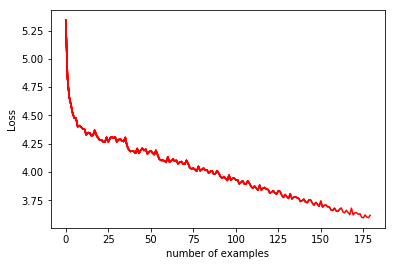

In [5]:
model = Seq2Seq(input_size=vocab_size).to(device)
train(model, pairs)

In [60]:
!nvidia-smi

Thu Sep 20 21:12:01 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.87                 Driver Version: 390.87                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  Off  | 00000000:01:00.0  On |                  N/A |
| 27%   39C    P2    26W / 120W |   1063MiB /  6075MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [61]:
torch.cuda.empty_cache()

RuntimeError: cuda runtime error (59) : device-side assert triggered at torch/csrc/cuda/Module.cpp:245

In [62]:
del model